# Volume 4: The Shooting Method for BVPs
    <Name>
    <Class>
    <Date>

In [2]:
# Import imports
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [3]:
def secant_method(h, s0, s1, max_iter=100, tol=1e-8):
    """
    Finds a root of h(s)=0 using the secant method with the
    initial guesses s0, s1.
    """
    for i in range(max_iter):
        # Get the residuals
        h0 = h(s0)
        h1 = h(s1)
        # Update
        s2 = s1 - h1 * (s1 - s0)/(h1 - h0)
        s0, s1 = s1, s2
        
        # Check convergence
        if abs(h1) < tol:
            return s2
    
    print("Secant method did not converge")
    return s2

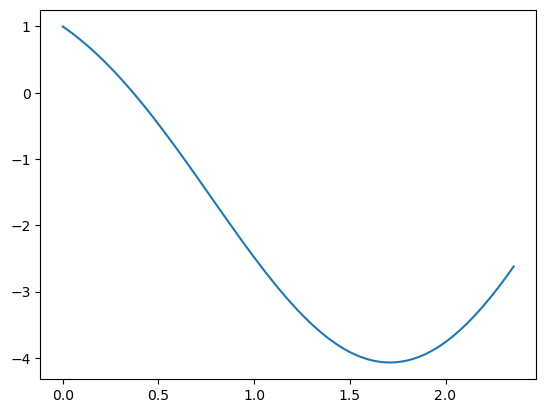

In [4]:
# Practice Problem in the Lab

# Define the ODE right-hand side
def ode(x,y):
    return np.array([
        y[1],
        -4*y[0]-9*np.sin(x)
    ])
    
# Endpoint values
a = 0
b = 3/4 * np.pi
alpha = 1
beta = - (1+3*np.sqrt(2))/2

# Define a residual function
def residual(s):
    # Find the right endpoint
    sol = solve_ivp(ode, (a,b), [alpha, s])
    yb = sol.y[0,-1]
    return yb - beta

# Find the right value of s using the secant method
s = secant_method(residual, (beta-alpha)/2, -1)

# Compute and plot the solution
x = np.linspace(0,3*np.pi/4, 100)
y = solve_ivp(ode, (a,b), (alpha, s), t_eval = x).y[0]

plt.plot(x,y)
plt.show()



# Problem 1

Appropriately defined initial value problems will usually have a unique solution.
Boundary value problems are not so straightforward; they may have no solution or they may have several, and you may have to determine which solutions are physically interesting.

Use the secant method to solve the following BVP:
\begin{equation*}
\begin{split}
y'' &= -e^{y-1}, \quad x \in [0,1],\\
y(0) &=y(1) =1.
\end{split}
\end{equation*}
This BVP has two solutions.
Using the secant method, find both numerical solutions and their initial slopes.
What initial values $s_0, s_1$ did you use to find them?

Values of S:
0.5492082775748754 10.864211209801159


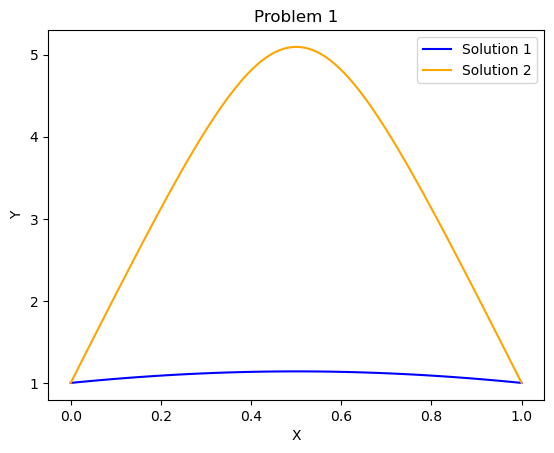

In [12]:
# Define the ODE for the right-hand side
def ode(x,y):
    return np.array([
        y[1],
        -np.exp(y[0] -1)
    ])
    
# Endpoint values
a = 0
b = 1
alpha = 1
beta = 1

# Define a residual function
def residual(s):
    # Find the right endpoint
    sol = solve_ivp(ode, (a,b), [alpha, s])
    yb = sol.y[0,-1]
    return yb - beta

# Find the right value of s during the secant method
s1 = secant_method(residual, (beta-alpha)/(b-a), 1)


# Find the second value of s during the secant method
s2 = secant_method(residual, 13, 14)

# Print out S values
print("Values of S:")
print(s1, s2)

# Compute and plot the solution
x = np.linspace(a,b, 100)
y = solve_ivp(ode, (a,b), (alpha, s1), t_eval = x).y[0]
y2 = solve_ivp(ode, (a,b), (alpha, s2), t_eval = x).y[0]

# Plot data
plt.plot(x,y, color = 'blue', label = 'Solution 1')
plt.plot(x,y2, color = 'orange', label = 'Solution 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Problem 1')
plt.legend()
plt.show()


# Problem 2

Use Newton's method to solve the BVP
\begin{align*}
y'' &= 3 + \frac{2y}{x^2}, \,\, x \in [1,e],\\
y(1) &= 6, \\
y(e) &= e^2 + 6/e
\end{align*}
Plot your solution.

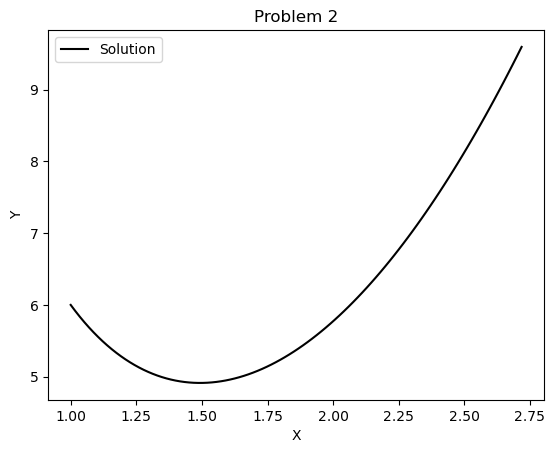

In [6]:
# Define the ODE for the right-hand side
def ode(x, y):
    return np.array([
        y[1],
        3 + (2*y[0])/x**2,
        y[3],
        2*(y[2])/x**2
    ])
   
# Initial values 
z_initial = 0
z_prime_initial = 1
y_initial = 6
a = 1
b = np.e
alpha = 6
beta = np.exp(2) + 6/np.e

# Define a residual function
def residual(s):
    # Find the right endpoint
    sol = solve_ivp(ode, (a, b), [alpha, s, z_initial, z_prime_initial])
    yb = sol.y[0, -1]
    return yb - beta

# Find the right value of s during the secant method
s1 = secant_method(residual, (beta-alpha)/(b-a), 1)

# Compute and plot the solution
x = np.linspace(a, b, 100)
y = solve_ivp(ode, (a, b), [alpha, s1, z_initial, z_prime_initial], t_eval=x).y[0]
plt.plot(x, y, color='black', label='Solution')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Problem 2')
plt.legend()
plt.show()



# Problem 3

Suppose we have a cannon that fires a projectile at a velocity of $45\text{ m/s}$, and the projectile has a mass of about $60$ kg, so that $\mu = .0003$.
At what angle $\theta(0)$ should it be fired to land at a distance of $195\text{ m}$?
Use the secant method to find initial values for $\theta$ that give solutions to the following BVP:
\begin{align}
	\begin{split}
\frac{dy}{dx} &= \tan {\theta} ,\\
\frac{dv}{dx} &= -\frac{g \sin{\theta} + \mu v^2}{v \cos{\theta}},\\
\frac{d\theta}{dx} &= -\frac{g}{v^2},\\
y(0)&= y(195) = 0,\\
v(0) &= 45 \text{ m/s}
	\end{split}
\end{align}
($g = 9.8067\text{ m/s}^2$.)

There are four initial angles $\theta(0)$ that produce solutions for this BVP when $\mu = 0.0003$.
Find and plot at least two of them.
Also find the two solutions when $\mu = 0$ (no air resistance), and compare.

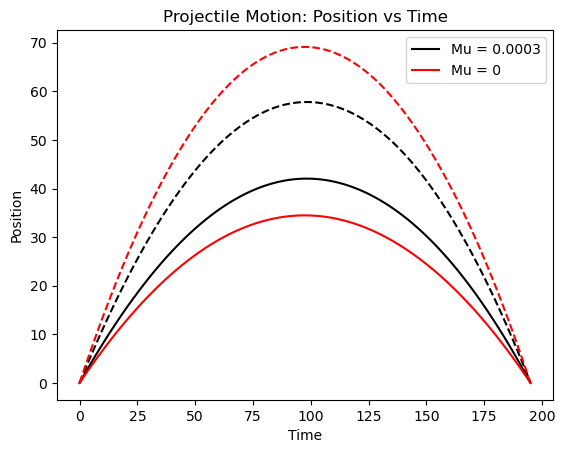

In [33]:
# Define constants
g = 9.8067
mu1 = 0.0003
mu2 = 0

# Define the ODE for the right-hand side
def ode(x, y, mu):
    return np.array([
        np.tan(y[2]),
        - (g * np.sin(y[2]) + mu * y[1]**2) / (y[1] * np.cos(y[2])),
        -g / y[1]**2
    ])

# Initial values
a = 0
b = 195
alpha = 0
beta = 0
v_initial = 45

# Define a residual function for mu = 0.0003
def residual1(s):
    # Find the solution
    sol = solve_ivp(ode, (a, b), [alpha, v_initial, s], t_eval=[b], args = (mu1,))
    yb = sol.y[0, -1]
    return yb - beta

# Define a residual function for mu = 0
def residual2(s):
    # Find the solution
    sol = solve_ivp(ode, (a, b), [alpha, v_initial, s], t_eval=[b], args = (mu2,))
    yb = sol.y[0, -1]
    return yb - beta

# Find the right value of s during the secant method
s1 = secant_method(residual1, 0.29, 0.30)  # Adjust the initial guesses
s2 = secant_method(residual1, 0.98, 0.99)


# Find the right value of s during the secant method for mu = 0
s3 = secant_method(residual2, 0.29, 0.30)  # Adjust the initial guesses
s4 = secant_method(residual2, 0.98, 0.99)

# Compute and plot the solution
x = np.linspace(a, b, 100)
y1 = solve_ivp(ode, (a, b), [alpha, v_initial, s1], t_eval=x, args = (mu1,)).y[0]
y2 = solve_ivp(ode, (a, b), [alpha, v_initial, s2], t_eval=x, args = (mu1,)).y[0]
y3 = solve_ivp(ode, (a, b), [alpha, v_initial, s3], t_eval=x, args = (mu2,)).y[0]
y4 = solve_ivp(ode, (a, b), [alpha, v_initial, s4], t_eval=x, args = (mu2,)).y[0]

# Plot the residuals
plt.plot(x, y1, color='black', label='Mu = 0.0003')
plt.plot(x, y2, color='black', linestyle='dashed')  # Use a different linestyle
plt.plot(x, y3, color='red', label='Mu = 0')
plt.plot(x, y4, color='red', linestyle='dashed')  # Use a different linestyle
plt.title('Projectile Motion: Position vs Time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()


